# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Аналітик даних в ІТ/Data/yulu_rental.csv')

In [4]:
# Перегляд типів даних DataFrame
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [5]:
# Уточнюючий перегляд типу колонки 'datatime' як OBJECT
type(df.iloc[0].datetime)

str

In [6]:
# Переформатування типу колонки 'datetime' з str в datetime та переадресація індекса df на 'datetime'
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додавання додаткових колонок для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [7]:
# Перегляд даних df
df.shape

(10886, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month        10886 non-null  int32  
 18  hour       

In [9]:
# Перевірка на рівень деталізації, на можливі часові інтервали між індексами та їх кількість:
df.index.to_series().diff().value_counts().sort_index()

,count
datetime,
0 days 01:00:00,10820
0 days 02:00:00,36
0 days 03:00:00,5
0 days 13:00:00,1
9 days 01:00:00,1
10 days 01:00:00,1
11 days 01:00:00,8
12 days 01:00:00,13


In [10]:
# Перевірка індексів df на унікальність
df.index.nunique()

10886

**Висновок:**

Наш датасет має: 10 886 рядків та 19 колонок.
Отже, набір даних має 10 886 записів.

Можемо побачити, що
- тип індексу DataFrame є DatetimeIndex;
- діапазон часу DataFrame - з 2011-01-01 00:00:00 до 2012-12-19 23:00:00;
- індекс має 10886 унікальних значень, що дорівнює кількості записів DataFrame;
- назви, кількість значень та типи колонок, відсутні чи не відсутні значення в них;
- об'єм всього DataFrame - 1.4+ МВ

*Рівень деталізації:*
- кожний рядок — це унікальна дата + час;
- формат дати YYYY-MM-DD HH:MM:SS;
- дані мають майже погодинну деталізацію, що підтверджується тим, що найбільш часта різниця між сусідніми індексами — 1 година (для 10820 записів).
Однак у часовому ряді присутні пропуски, оскільки деякі різниці становлять 2, 3 години, а також значно довші інтервали (9,10,11 та 12 днів).

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [11]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


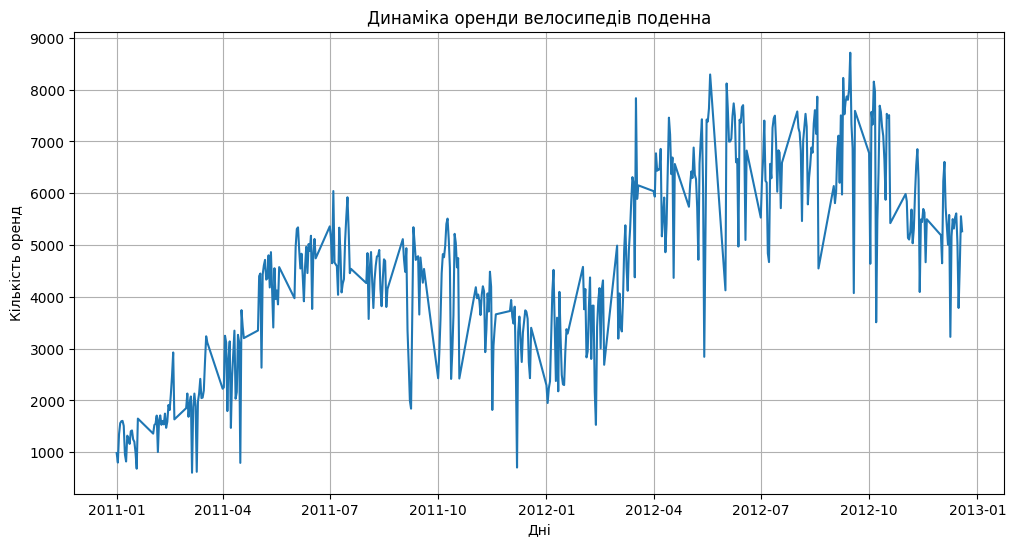

In [12]:
# 1-й спосіб: Групування даних по кількості орендованих велосипедів поденно через GROUPBY()
days_bike_count1 = df.groupby('date')['count'].sum()
days_bike_count1.plot.line(figsize = (12,6),
                          title = 'Динаміка оренди велосипедів поденна',
                          xlabel = 'Дні',
                          ylabel = 'Кількість оренд',
                          grid = True);

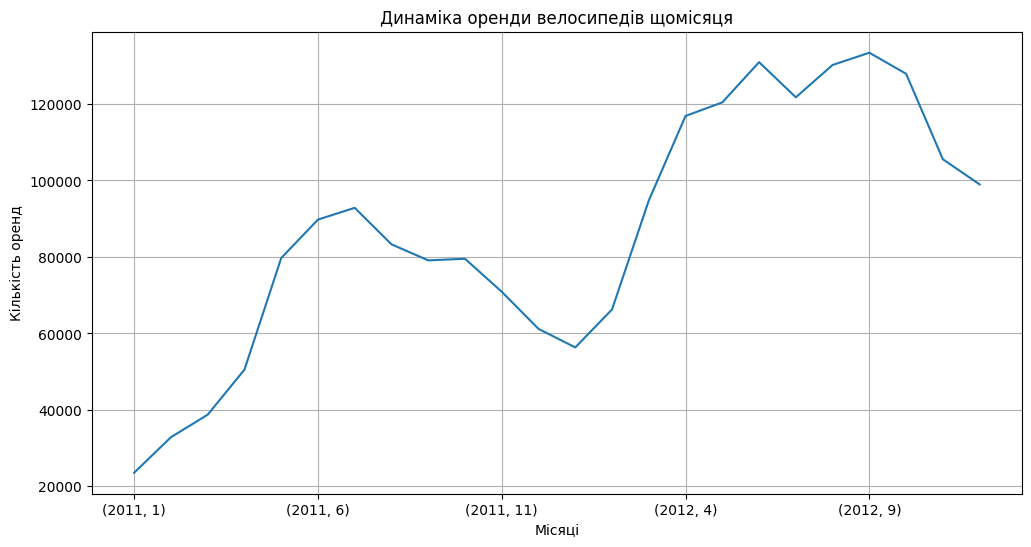

In [13]:
# Групування через GROUPBY() щомісячно
days_bike_count11 = df.groupby(['year','month'])['count'].sum()
days_bike_count11.plot.line(figsize = (12,6),
                          title = 'Динаміка оренди велосипедів щомісяця',
                          xlabel = 'Місяці',
                          ylabel = 'Кількість оренд',
                          grid = True);

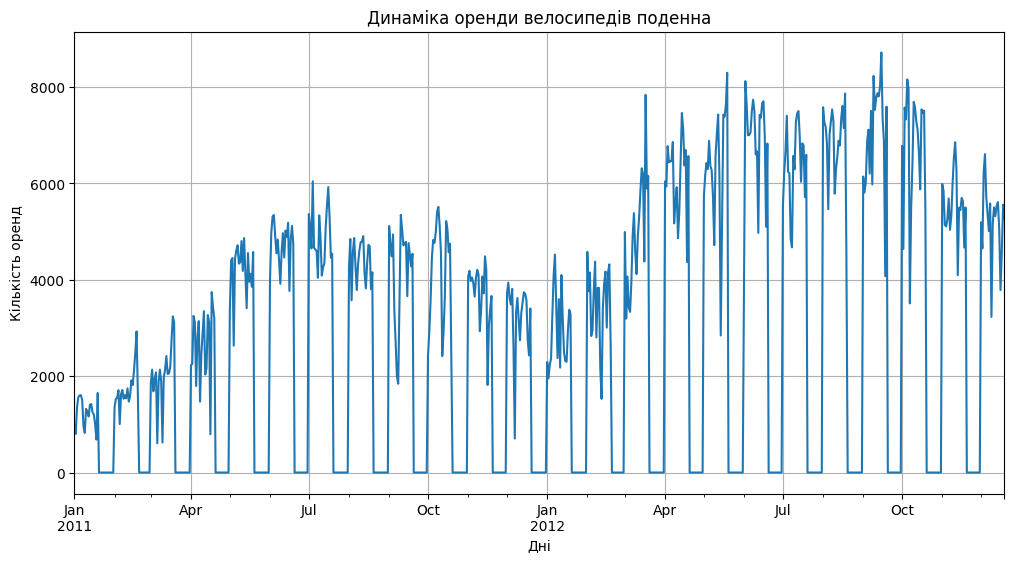

In [14]:
# 2-й спосіб: Групування даних по кількості орендованих велосипедів поденно через RESAMPLE()
days_bike_count2 = df['count'].resample('D').sum()
days_bike_count2.plot.line(figsize = (12,6),
                          title = 'Динаміка оренди велосипедів поденна',
                          xlabel = 'Дні',
                          ylabel = 'Кількість оренд',
                          grid = True);

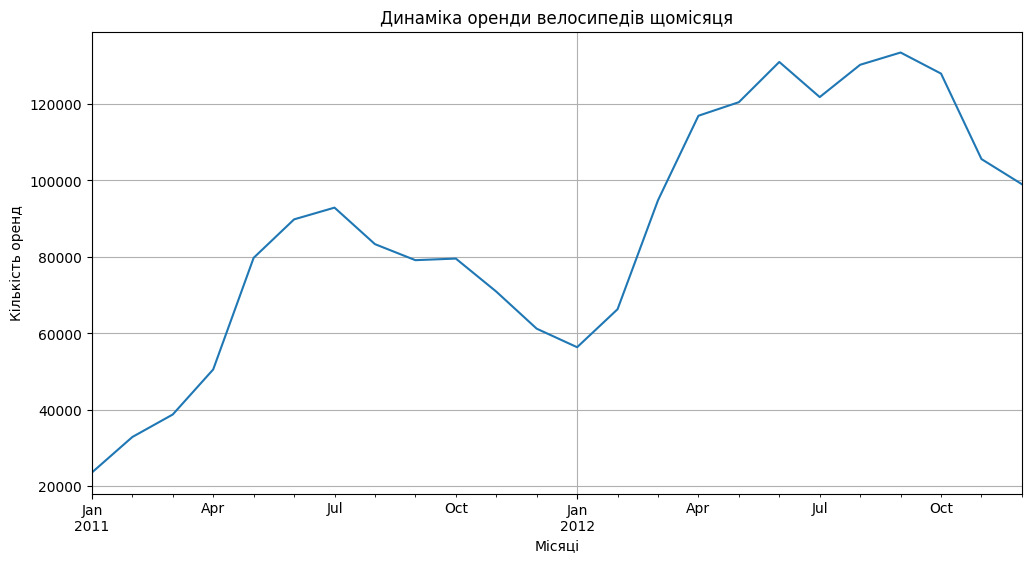

In [15]:
# Групування даних через RESAMPLE() щомісячно
days_bike_count21 = df['count'].resample('ME').sum()
days_bike_count21.plot.line(figsize = (12,6),
                          title = 'Динаміка оренди велосипедів щомісяця',
                          xlabel = 'Місяці',
                          ylabel = 'Кількість оренд',
                          grid = True);

In [16]:
# Пошук періодів між часовими індексами, який перевищує добу (інтервал поденного лінійного графіку)
# По попередній оцінці деталізації таких записів має бути 23 ... кількість місяців за два роки
diffs = df.index.to_series().diff()
anomalies = diffs[diffs > pd.Timedelta(days=1)]
anomalies

,datetime
datetime,
2011-02-01,12 days 01:00:00
2011-03-01,9 days 01:00:00
2011-04-01,12 days 01:00:00
2011-05-01,11 days 01:00:00
2011-06-01,12 days 01:00:00
2011-07-01,11 days 01:00:00
2011-08-01,12 days 01:00:00
2011-09-01,12 days 01:00:00
2011-10-01,11 days 01:00:00


**Висновок до завдання 1:**

*Опис даних:*

дані мають погодинну деталізацію протягом доби, але лише частково.
Усі великі інтервали між записами (>1 доби) припадають на період перед 1 числом кожного місяця. Це означає, що дані містять погодинні значення лише з початку місяця до приблизно 19-го числа.
Період із 20-го числа поточного місяця до 1 числа наступного місяця повністю відсутній в даних.
І це не помилки запису, не зіпсовані рядки. Це скоріше, особливість структури аналізуємого датасету, патерність збору даних.

*Опис лінійних графіків:*
- лінійні графіки створено двома способами - через groupby() та resample() для порівняння методів формування;
- візуалізація двох способів для поденних графіків відрізняється, і причина в тому, що групування через groupby() відкидає дані, яких немає в часовому ряду датасету, і вони не відображаються, в той час як resample() відображає весь часовий ряд без виключень з "заломами" і дає явно побачили пропуски в даних, опис який надано вище;
- зглажені лінійні графіки за рахунок збільшення інтервалу аналізу з доби до місяця мають практично схожий вигляд, бо відсутні "дири" в даних. Вони дають можливість прибрати "заломи"

Лінійний поденний (щомісячний) графік демонструє чіткий попит на оренду велосипедів і чітку сезонність із зростанням навесні, з піком влітку та зниженням восени, а також деякі аномальні значення.
Аномально низькі значення - це не реальні "провали", а наслідок повної відсутності даних у певні дні.
Аномально високі одномоментні піки можуть бути спричинені:
- святковими днями;
- теплими погодними умовами;
- іншими особливими подіями

Але в цілому всі піки вписуються у сезонну логіку — це періоди високого попиту влітку, зниження попиту взимку.

Варто зазначити, що у 2012 році попит вищий, ніж у 2011 — це може вказувати на розвиток сервісу або збільшення кількості користувачів.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

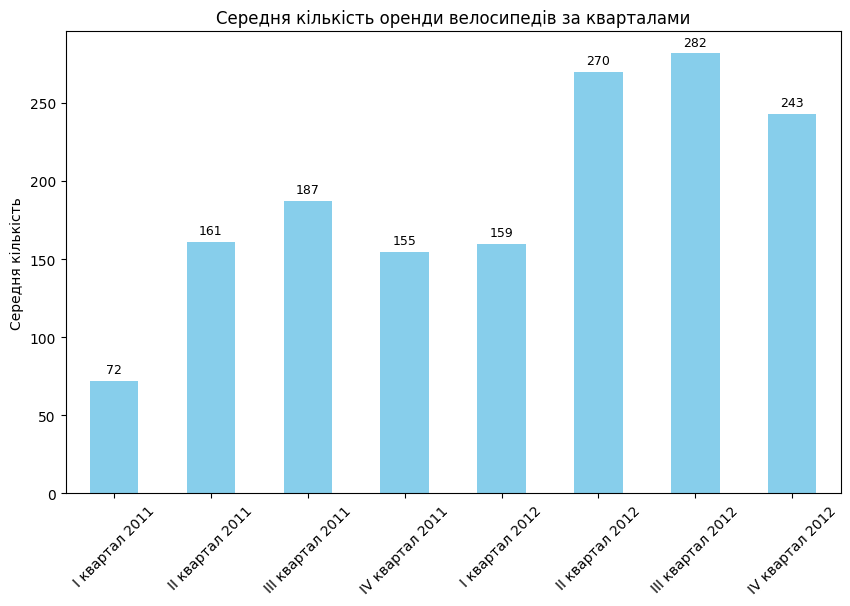

In [17]:
quart_rent_mean = df['count'].resample('QE').mean()

# створення фігури і вісі
fig, ax = plt.subplots(figsize=(10, 6))

quart_rent_mean.plot.bar(
    ax=ax,
    color='skyblue',
    title ='Середня кількість оренди велосипедів за кварталами',
    xlabel = '',
    ylabel = 'Середня кількість'
    )

# заміна підписів кварталів
ax.set_xticklabels([
    'I квартал 2011',
    'II квартал 2011',
    'III квартал 2011',
    'IV квартал 2011',
    'I квартал 2012',
    'II квартал 2012',
    'III квартал 2012',
    'IV квартал 2012'
    ], rotation=45)

# створення підписів над стовпцями
for i, v in enumerate(quart_rent_mean.values):
    ax.text(i, v + 5, f'{v:.0f}', ha='center', fontsize=9);

In [18]:
quart_rent_mean.values

array([ 71.90551776, 160.94074616, 186.99487179, 154.78712509,
       159.47688921, 269.60175695, 281.73538012, 243.18946598])

**Відповіді на питання по завданню 2:**

1. В який квартал найбільша середня кількість оренди велосипедів? - ІІІ квартал 2012 року має пік середньої кількості оренд через оптимальну погоду, максимальну велоактивність і вищий загальний тренд розвитку сервісу у 2012 році порівняно з 2011.
2. Як ви можете пояснити таку сезонну закономірність? - Це класична сезонність для велосипедних сервісів, пов'язаних з погодою:
- низькі значення взимку - дощі, сніг, низькі температури (І квартал);
- зростання оренди навесні - потепління, сонце (ІІ квартал);
- активність влітку - гарна, суха погода, високі комфортні температури повітря (ІІІ квартал);
- зниження восени - дощі, похолодання, сніг (ІV квартал).

Сезонність має чіткий повторюваний річний характер.

3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталами? - у 2011 році в 2.6 разів, у 2012 році - 1,8

Різниця в сезонних коливаннях між 2011 і 2012 роками зменшилась: у 2012 році зимові показники трохи зросли, а літні — стабілізувалися, що може вказувати на розвиток сервісу або більш стабільний потік користувачів.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


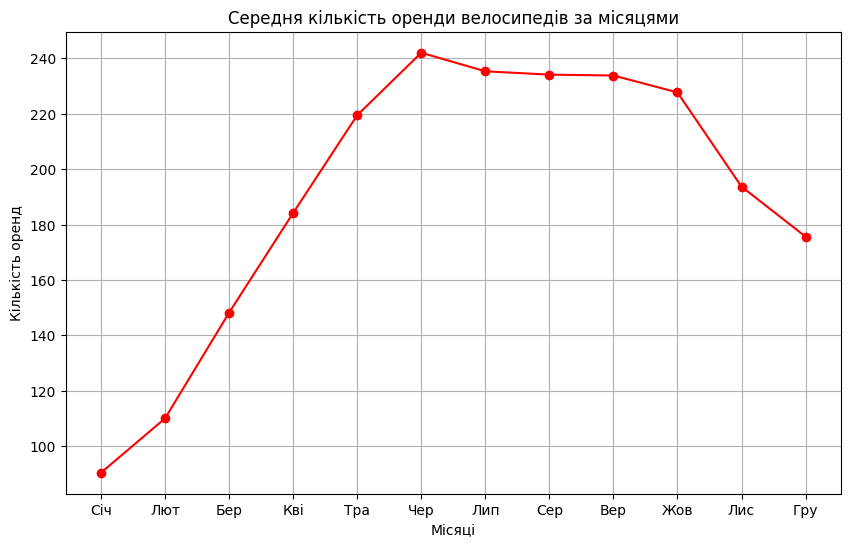

In [19]:
month_rent_mean = df.groupby('month')['count'].mean()
month_rent_mean.plot.line(figsize = (10,6),
                          marker = 'o',
                          color = 'red',
                          title = 'Середня кількість оренди велосипедів за місяцями',
                          xlabel = 'Місяці',
                          ylabel = 'Кількість оренд',
                          grid = True)
plt.xticks(
    ticks=range(1, 13),
    labels=['Січ','Лют','Бер','Кві','Тра','Чер','Лип','Сер','Вер','Жов','Лис','Гру']
    );


**Відповіді на питання по завданню 3:**

1. В які місяці спостерігається пік та спад оренди? - Максимальна середня кількість орендованих велосипедів у червні, а мінімальна - у січні.
2. Чи збігається ця закономірність з результатами з попереднього завдання? - Так, це ознаки сезонності. Сезонність повністю збігається з квартальним аналізом
3. Як може вплинути клімат на оренду велосипедів протягом року?
- дощ, сніг, низькі температури знижують попит;
- в той час, як суха погода з значно теплими температурами підвищує показники сервису оренди велосипедів.

Температура, опади та тривалість світлового дня — є ключовими факторами.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

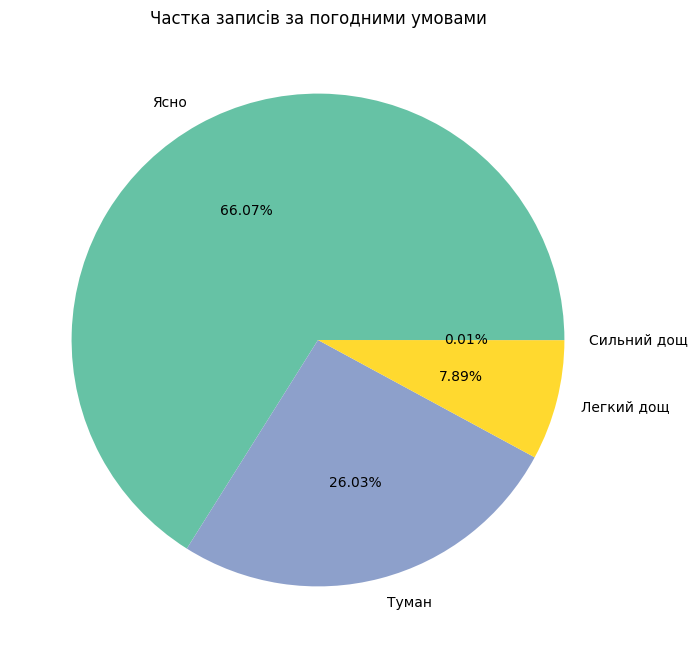

In [20]:
import numpy as np
weather_chart = df['weather'].value_counts().sort_index()
weather_chart.plot.pie(
            figsize = (8,8),
            autopct = '%1.2f%%',
            labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
            title = 'Частка записів за погодними умовами',
            colors = plt.cm.Set2(np.linspace(0, 1, 4))
            )
plt.ylabel('');

**Відповіді на питання по завданню 4:**

1. Яка погода переважає в датасеті? - 66% погодних умов відповідають "Ясно" і це логічно, бо дані зібрані в Індії
2. Чи є дні із сильним дощем? Яка їх частка? - є такі дні, але їх частка всього 0,01%
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів? - чим сухіша та тепліша погода, тім показники по оренді більше, відвідувачів більше

Очікуваний результат:

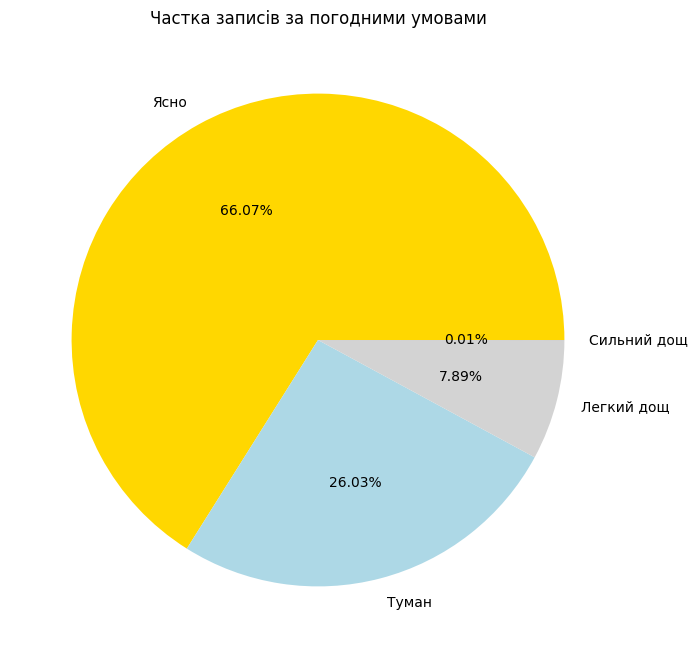

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

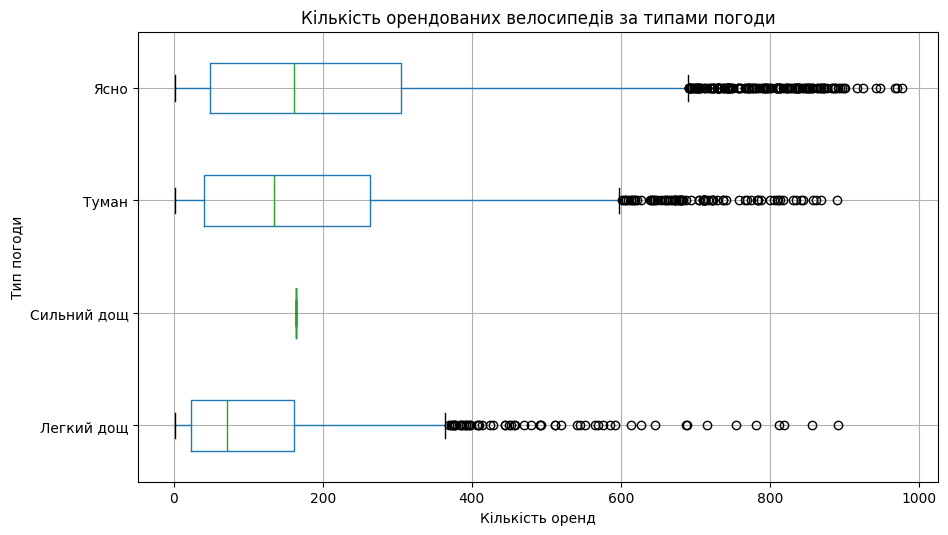

In [21]:
df['weather_name'] = df['weather'].map({
      1: 'Ясно',
      2: 'Туман',
      3: 'Легкий дощ',
      4: 'Сильний дощ'
      })
ax = df.boxplot(
                column='count',
                by='weather_name',
                vert=False,                    # горизонтальна орієнтація
                figsize=(10, 6)
)
ax.set_title('Кількість орендованих велосипедів за типами погоди')
ax.set_xlabel('Кількість оренд')
ax.set_ylabel('Тип погоди')

plt.suptitle('')
plt.show();

In [78]:
df.groupby('weather')['count'].median()

,count
weather,
1,161.0
2,134.0
3,71.0
4,164.0


**Відповідь на питання по завданню 5:**

1. При якій погоді найбільший розкид у кількості оренди? - При ясній погоді. Це можна побачити по найдовшій коробці (найбільший розкид 50% значень), по найдовшим "вусам", що показують - значення сильно коливаються між min та max значеннями, і ще дуже багато точок-викидів праворуч

І це логічно, бо в ясну погоду найбільше людей бере велосипеди і найбільший діапазон попиту.

2. Чи є викиди (outliers) в даних? При якій погоді? - Так, є. Найбільше викидів у гарну, ясну погоду, трошки менше - коли легкий дощ, туман, а найменше — у сильний дощ, бо попиту практично немає.
3. При якій погоді медіанне значення оренди найвище? - як не дивно, але це підтвердив не тільки графік, а ще й розрахунки, що медіана при сильному дощі (164) майже така ж, як при ясній погоді (161) і значно вища, ніж при тумані та легкому дощі. Але це НЕ означає, що сильний дощ — комфортна погода)))) і не означає, що люди масово беруть велосипеди під зливою))))) Це, мабуть, очікувана поведінка статистики в умовах дуже маленької вибірки по сильному дощу

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

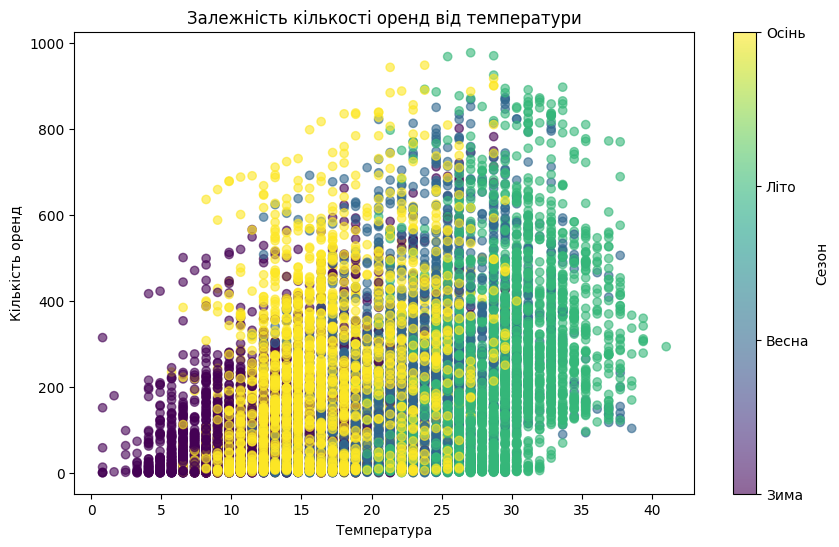

In [29]:
plt.figure(figsize=(10,6))

scatter = plt.scatter(
    df['temp'],
    df['count'],
    c=df['season'],
    cmap='viridis',
    alpha=0.6
)
cbar = plt.colorbar(scatter)
cbar.set_label('Сезон')
cbar.set_ticks([1, 2, 3, 4])
cbar.set_ticklabels(['Зима', 'Весна', 'Літо', 'Осінь'])

plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.title('Залежність кількості оренд від температури')

plt.show()

**Відповідь на питання по завданню 6:**

Чи є зв'язок між температурою та кількістю оренди? Який? -

Кількість оренд велосипеда зростає разом із температурою, поки не досягає комфортного максимуму.
 - в сезон низьких температур  від 0 до 10°C оренд дуже мало і більшість точок біля нуля;
 - коли температура піднімається до 20°C, кількість оренд зростає до 600–800;
 - а при дуже високих температурах (35–40°C) йде легке зниження оренд, бо занадто спекотно.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [33]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_rent = df.groupby('weekday')[['casual', 'registered']].mean().reindex(weekday_order)
weekdays_rent

,casual,registered
weekday,,
Monday,29.843972,160.546744
Tuesday,22.979207,166.744639
Wednesday,22.521599,165.889749
Thursday,24.007083,173.289118
Friday,31.001962,166.842381
Saturday,63.625000,133.040404
Sunday,57.051298,123.788474


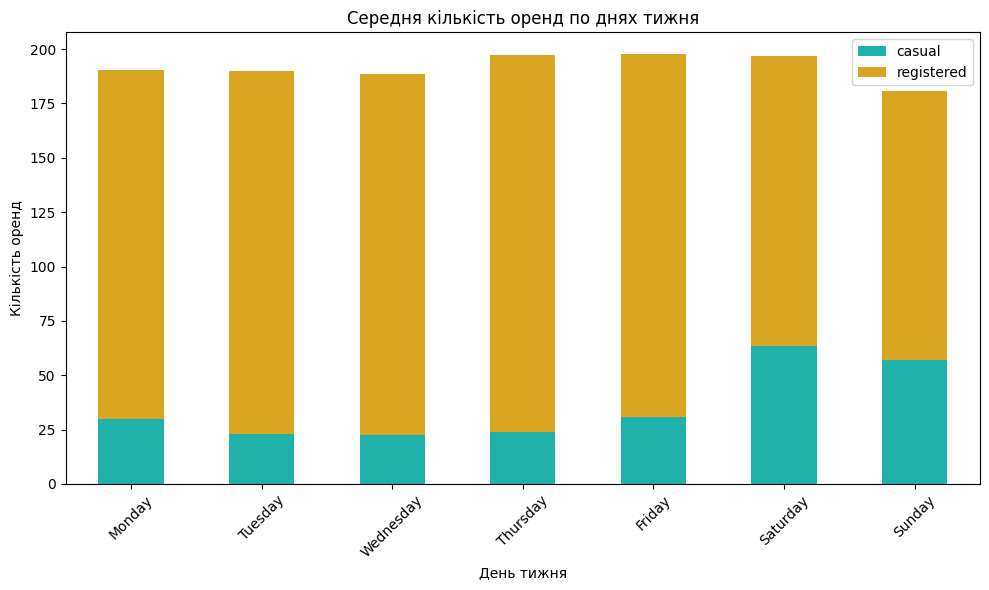

In [47]:
# Звичайний Stacked Bar Chart
ax = weekdays_rent.plot.bar(
                stacked=True,
                figsize=(10, 6),
                color=['lightseagreen', 'goldenrod'],
                title='Середня кількість оренд по днях тижня',
                xlabel = 'День тижня',
                ylabel = 'Кількість оренд',
                legend = ['Випадкові (casual)', 'Зареєстровані (registered)']
                )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

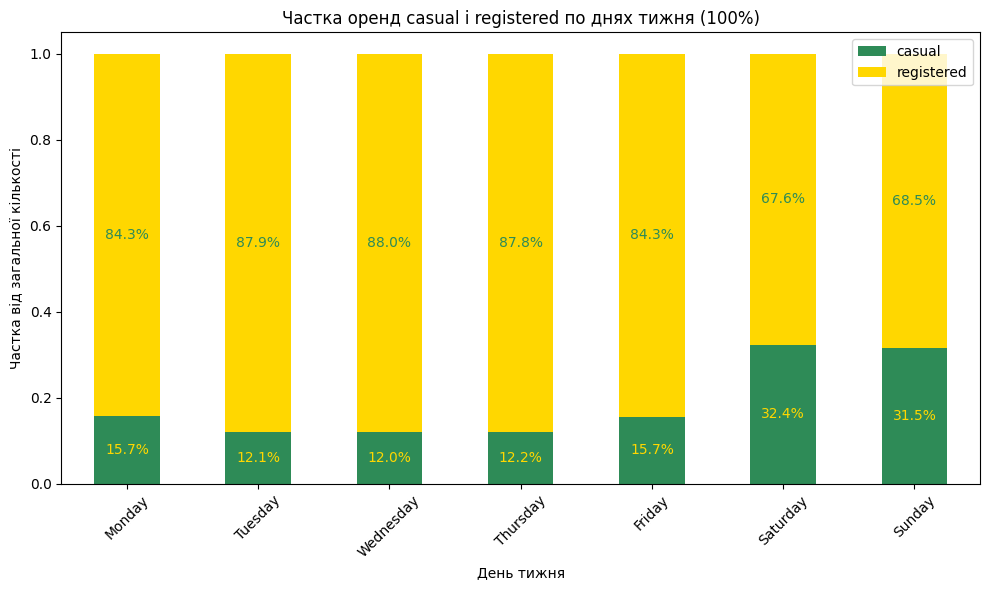

In [50]:
# 100% Stacked Bar Chart
weekdays_share = weekdays_rent.div(weekdays_rent.sum(axis=1), axis=0)

ax = weekdays_share.plot.bar(
                stacked=True,
                figsize=(10,6),
                color=['seagreen', 'gold'],
                title='Частка оренд casual і registered по днях тижня (100%)',
                xlabel = 'День тижня',
                ylabel = 'Частка від загальної кількості'
                #legend = ['Випадкові (casual)', 'Зареєстровані (registered)']
                )
plt.xticks(rotation=45)
plt.legend(['casual', 'registered'], loc='upper right')
plt.tight_layout();

for i, day in enumerate(weekdays_share.index):
    casual = weekdays_share.loc[day, 'casual']
    registered = weekdays_share.loc[day, 'registered']

    ax.text(i, casual/2, f'{casual*100:.1f}%', ha='center', va='center', color='gold')
    ax.text(i, casual + registered/2, f'{registered*100:.1f}%', ha='center', va='center', color='seagreen')


**Відповіді на питання по завданню 7:**

1. В які дні тижня більше оренд від зареєстрованих користувачів? - Дуже гарно це можна побапчити на 100% Stacked Bar Chart:
- доля зареєстрованих користувачів в середу (88%), вівторок (87,9%) та четвер (87,8%) найбільша;
- в понеділок та п'ятницю доля зареєстрованих трошки зменшується, але все рівно велика відносно вихідних.
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?
Скоріше за все зареєстровані користувачі в робочі дні їздять на роботу і це їм вигідніше, ніж використовувати міський транспорт.
У вихідні орендують дуже активно велосипеди і інші групи користувачів